## Introduction
House prices are positively correlated to higher standard of living. This submetric serves to see which neighborhood has the highest house prices.

## Metric
As mentioned above, my metric is the average home value of the neighborhoods in Pittsburgh.

## Data
House value is measured on an index value. The lower the value, the lower the price. Neighborhoods are listed in the dataset.

## Results
The graph shows the neighborhoods selected in the dataset. It demonstrates the average house value of the neighborhoods from 2010. As shown on the graph, Allentown has the highest average index, indicating the highest average home value.

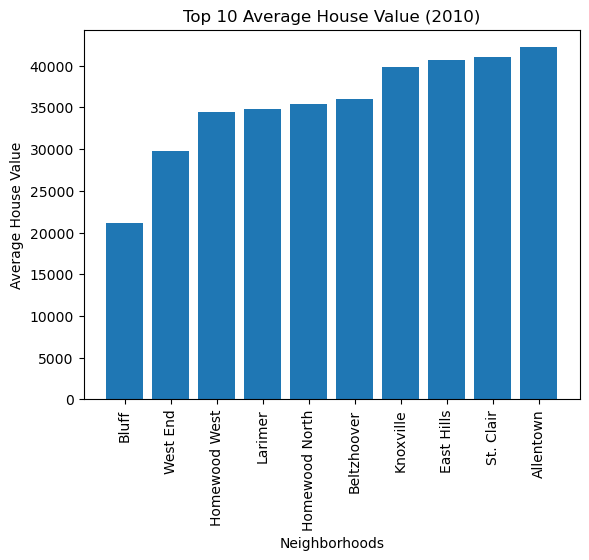

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#Obtaining data from the dataset
house = pd.read_csv("housing.csv")


# Combining neighborhoods with identical names
def clean_name(name):
    return re.sub(r'\s*\d+$','',str(name)).strip()
    
house['clean_name'] = house['Neighborhood'].apply(clean_name)

house["Median Home  Value (2010)"] = (house["Median Home  Value (2010)"].str.replace("$","", regex = False).str.replace(",","",regex = False))

house["Median Home  Value (2010)"] = pd.to_numeric(house["Median Home  Value (2010)"], errors = "coerce")


#Averaging house value
average_nb_value = house.groupby('clean_name')['Median Home  Value (2010)'].mean().sort_values(ascending = True)

#Getting top 10
top10_nb = average_nb_value.head(10)

#Plotting the data
plt.bar(top10_nb.index, top10_nb.values)
plt.xticks(rotation = 90)
plt.xlabel('Neighborhoods')
plt.ylabel('Average House Value')
plt.title('Top 10 Average House Value (2010)')
plt.show()